In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
sns.set()

<Figure size 800x600 with 0 Axes>

In [4]:
# Data Ingestion

data_df = pd.read_csv('data/train/train.csv')
data_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
# First we can drop the id column
data_df.drop(columns=['id'], axis=1, inplace=True)

In [6]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
# Check for null values
data_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
# We dont have any null values

In [9]:
# Check for duplicate rows

data_df.duplicated().sum()

0

In [10]:
# We dont have any duplicate rows

In [11]:
# Check the datatypes of columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [12]:
# Store the numerical and categorical feature names in different lists

numerical_columns = data_df.columns[data_df.dtypes != 'O']
categorical_columns = data_df.columns[data_df.dtypes == 'O']

print(f"Numerical Columns: {numerical_columns}")
print(f"Categorical Columns: {categorical_columns}")

Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [13]:
# Some priliminary EDA of categorical columns
data_df[categorical_columns].describe() 

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [14]:
for column in categorical_columns:
    print(data_df[column].value_counts())
    print('\n')

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64


G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64


SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64




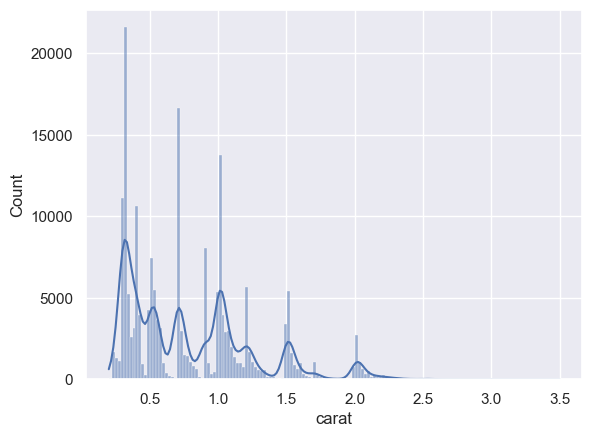

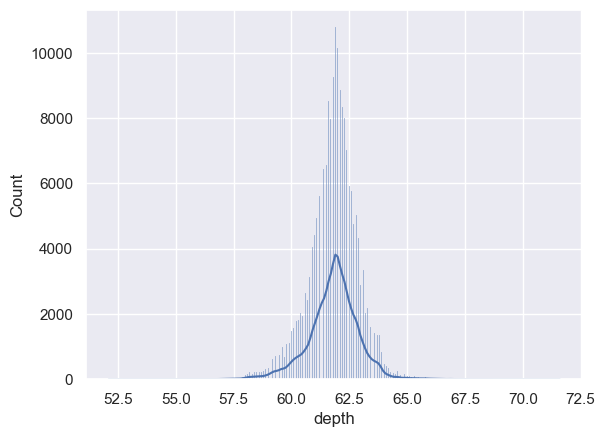

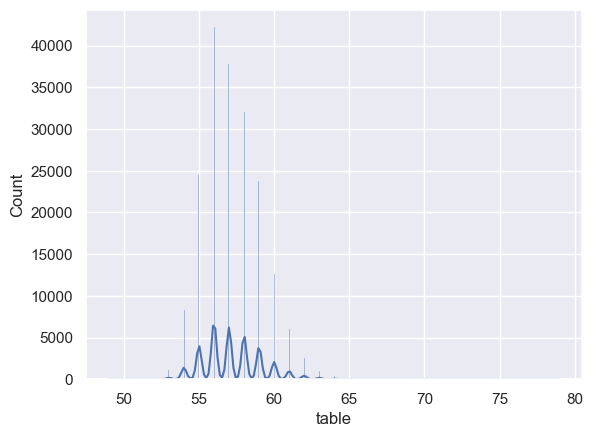

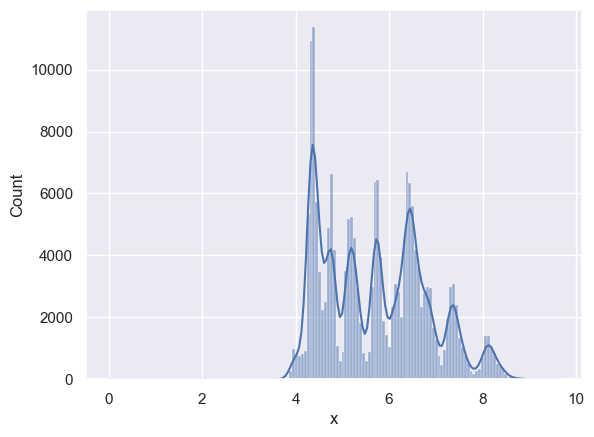

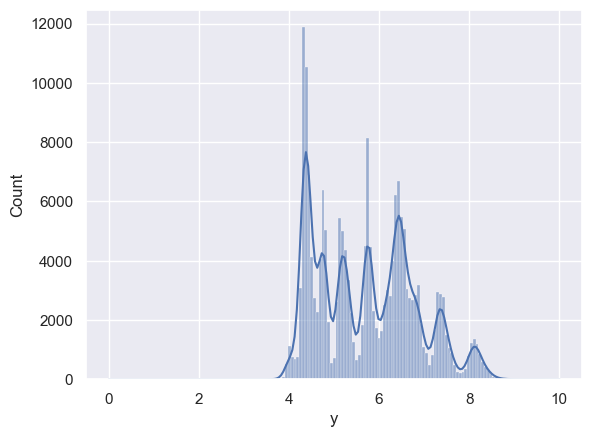

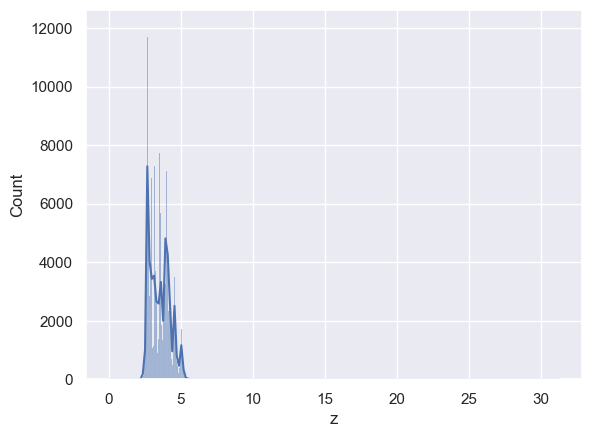

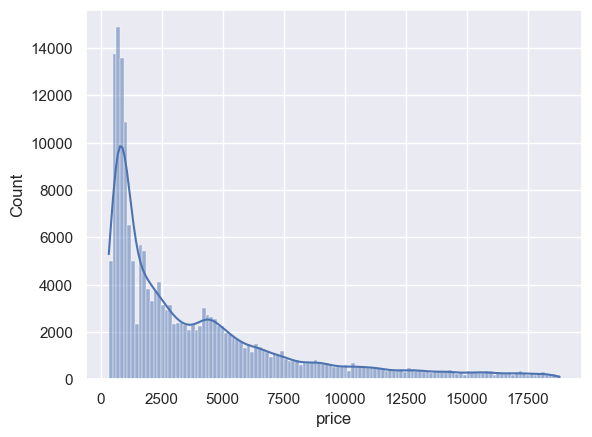

In [33]:
for x in numerical_columns:
    sns.histplot(data=data_df, x=x, kde=True)
    plt.show()

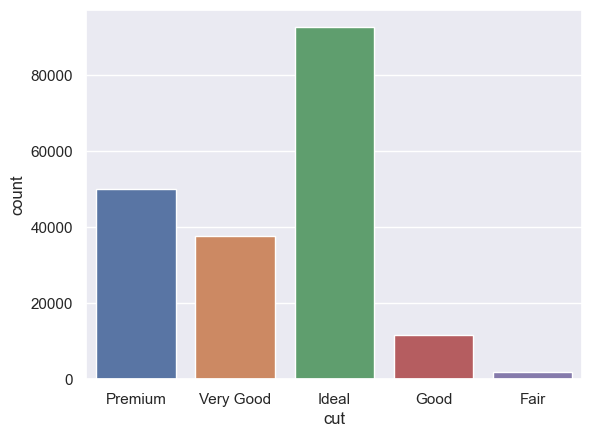

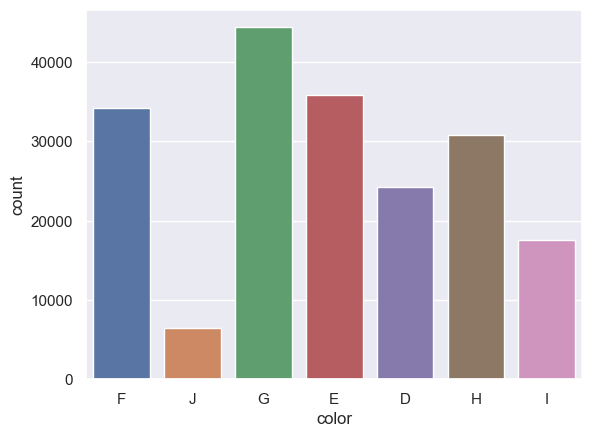

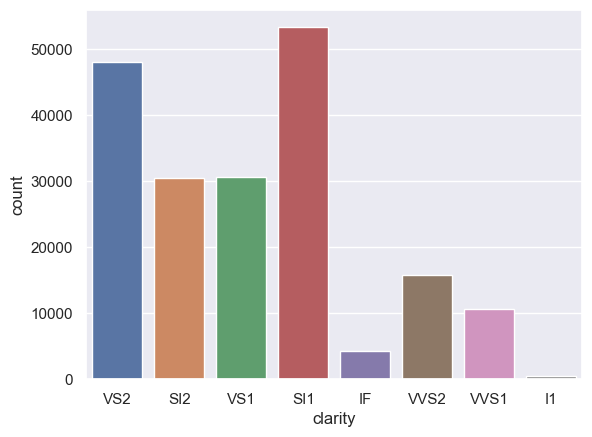

In [34]:
for x in categorical_columns:
    sns.countplot(data=data_df, x=x)
    plt.show()

C:\Users\Abhijit\AppData\Local\Temp\ipykernel_7776\2564611068.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True)


<Axes: >

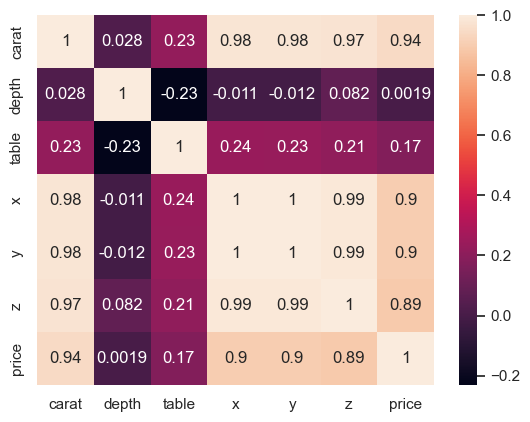

In [35]:
# Check the correlation

sns.heatmap(data_df.corr(), annot=True)

In [36]:
# We can see that Columns x, y, z  and carat are highly correlated. 

In [37]:
# Encode the categorical features

cut_map = {
    'Fair': 1,
    'Good': 2,
    'very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

clarity_map = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}

color_map = {
    'D': 1,
    'E': 2,
    'F': 3,
    'G': 4,
    'H': 5,
    'I': 6,
    'J': 7
}

In [38]:
data_df['cut'] = data_df['cut'].map(cut_map)
data_df['clarity'] = data_df['clarity'].map(clarity_map)
data_df['color'] = data_df['color'].map(color_map)

data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4.0,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,NaN,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5.0,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5.0,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4.0,4,4,62.6,59.0,7.65,7.61,4.77,14453
